# 1. House Prices

## 2. Load and explore the data


In [1]:
import numpy as np
import pandas as pd


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")


Train shape: (1460, 81)
Test shape: (1459, 80)


In [3]:
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the `.info()` output, we can already identify several important issues to address before modeling:

- Some features have a **very high percentage of missing values**, such as `PoolQC`, `Alley`, `MiscFeature`, and `Fence`. These are likely to be dropped or filled with "None" if they represent the absence of a feature (e.g., no pool, no fence).
- Features like `FireplaceQu`, `Garage*`, and `Bsmt*` have a moderate amount of missing values and may require **careful imputation** based on domain knowledge (e.g., does a missing garage indicate no garage, or missing data?).
- `GarageYrBlt` is stored as a `float64` due to missing values, but it's actually a **year** and should be treated accordingly.
- The dataset contains a mix of **categorical**, **ordinal**, and **numerical** variables, which will require different encoding strategies.
- The `Id` column is a unique identifier and has no predictive power — we will drop it before training.

We will further analyze the missing values and their distribution in the next step.


In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


This summary provides basic statistics for the numerical features. A few key insights:

- Many features (e.g. `3SsnPorch`, `PoolArea`, `MiscVal`, `MasVnrArea`) have a **median of 0**, suggesting they are missing in most homes. These might benefit from being transformed into binary indicators (e.g. "HasPool").
- Several features such as `LotArea`, `GrLivArea` and `SalePrice` are **heavily skewed** and contain outliers. Log-transformations may help stabilize variance and improve model performance.
- `LotFrontage` shows only 1201 non-null values out of 1460 ⇒ needs imputation.
- `SalePrice` (our target) has a wide range (from \$34,900 to \$755,000), and is not normally distributed — log-scaling will likely help.

In the next step, we will visualize these distributions and start preparing the dataset for modeling.


In [6]:
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Here are the columns with missing values, sorted by number of nulls:

- Features like `PoolQC`, `MiscFeature`, `Alley`, and `Fence` have **over 80% missing values**. These likely indicate the absence of the feature (e.g. no pool, no alley access) and should be filled with `"None"` or dropped if not useful.
- `FireplaceQu`, `Garage*`, and `Bsmt*` are moderately missing and will require conditional imputation (e.g. `"None"` if no fireplace, garage, or basement).
- `LotFrontage` has ~18% missing values and may benefit from **median imputation based on Neighborhood**, which captures lot size patterns.
- `MasVnrArea` and `MasVnrType` are related — missing values might mean no masonry veneer. Impute accordingly.
- `Electrical` has only one missing value and can safely be imputed using the most frequent value (`"SBrkr"`).

We’ll address these issues in the data cleaning phase before modeling.


## 3. Missing values


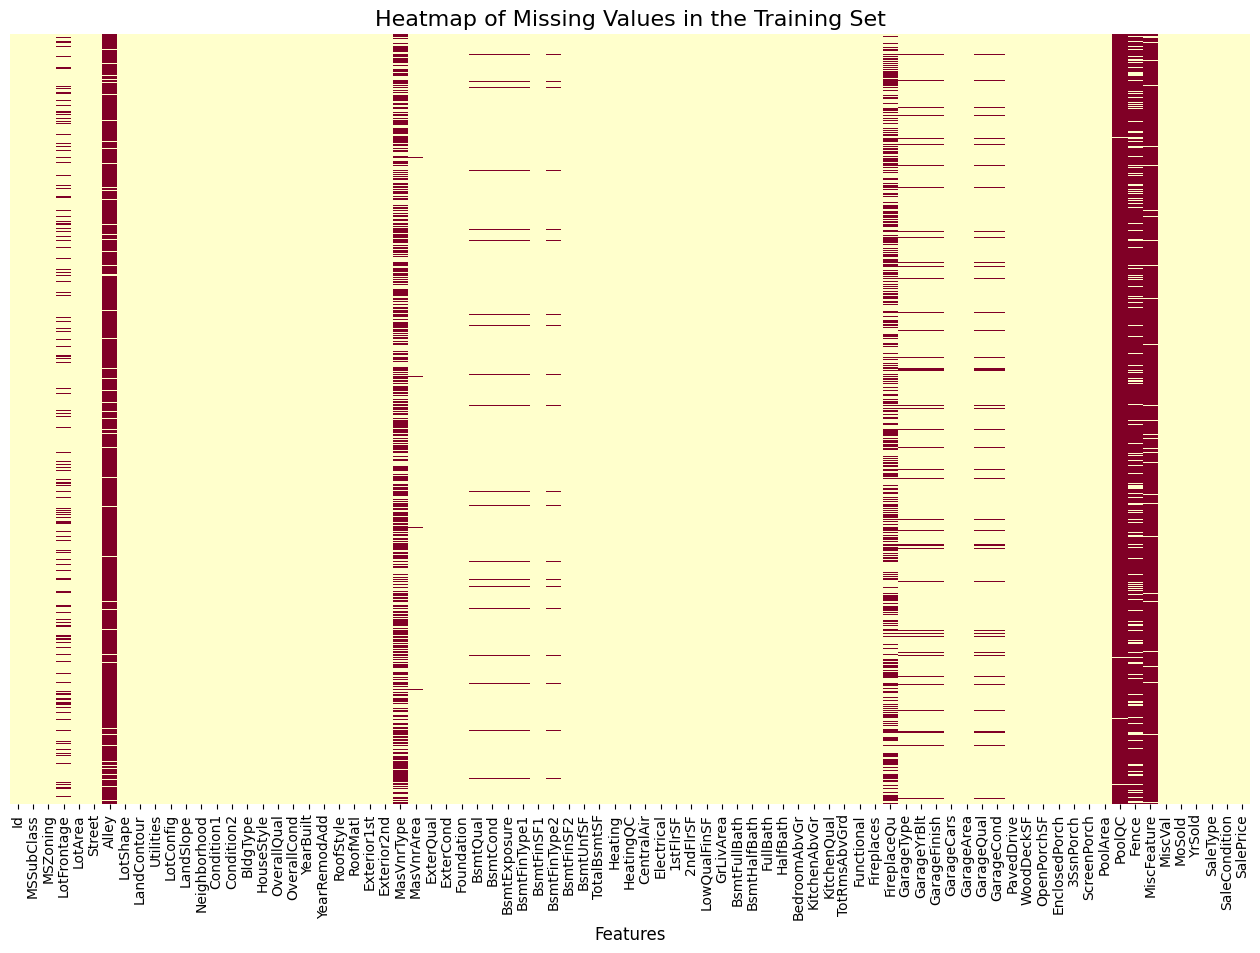

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_data = train_df.isnull()


plt.figure(figsize=(16, 10))

sns.heatmap(missing_data, 
            cbar=False, 
            cmap="YlOrRd", 
            yticklabels=False)

plt.title("Heatmap of Missing Values in the Training Set", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.show()


Fill "None" for features that imply absence of a property

In [ ]:
def clean_data(df):
 
    none_fill_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
    for col in none_fill_cols:
        if col in df.columns:
            df[col] = df[col].fillna("None")
    garage_cat = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
    for col in garage_cat:
        if col in df.columns:
            df[col] = df[col].fillna("None")
    if 'GarageYrBlt' in df.columns:
        df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

    bsmt_cat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    for col in bsmt_cat:
        if col in df.columns:
            df[col] = df[col].fillna("None")

    if 'MasVnrType' in df.columns:
        df['MasVnrType'] = df['MasVnrType'].fillna("None")
    if 'MasVnrArea' in df.columns:
        df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

    if 'LotFrontage' in df.columns and 'Neighborhood' in df.columns:
        df['LotFrontage'] = df.groupby("Neighborhood")['LotFrontage'].transform(
            lambda x: x.fillna(x.median())
        )

    if 'Electrical' in df.columns:
        df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    return df



In [ ]:
def clean_data(df):
     
 
    none_fill_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
    for col in none_fill_cols:
        if col in df.columns:
            df[col] = df[col].fillna("None")

    garage_cat = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
    for col in garage_cat:
        if col in df.columns:
            df[col] = df[col].fillna("None")
    if 'GarageYrBlt' in df.columns:
        df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
 
    bsmt_cat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
    for col in bsmt_cat:
        if col in df.columns:
            df[col] = df[col].fillna("None")
 
    if 'MasVnrType' in df.columns:
        df['MasVnrType'] = df['MasVnrType'].fillna("None")
    if 'MasVnrArea' in df.columns:
        df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
 
    if 'LotFrontage' in df.columns and 'Neighborhood' in df.columns:
        df['LotFrontage'] = df.groupby("Neighborhood")['LotFrontage'].transform(
            lambda x: x.fillna(x.median())
        )

 
    if 'Electrical' in df.columns:
        df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

    return df


In [ ]:
train_df = clean_data(train_df)
test_df = clean_data(test_df)

print("Missing values in train set:", train_df.isnull().sum().sum())
print("Missing values in test set:", test_df.isnull().sum().sum())


Missing values in train set: 0
Missing values in test set: 22


In [11]:
test_df.isnull().sum()[test_df.isnull().sum() > 0].sort_values(ascending=False)


MSZoning        4
Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [ ]:
cat_mode_cols = ['MSZoning', 'Utilities', 'Functional', 'Exterior1st',
                 'Exterior2nd', 'KitchenQual', 'SaleType']
for col in cat_mode_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

num_zero_cols = ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 'GarageArea']
for col in num_zero_cols:
    test_df[col] = test_df[col].fillna(0)


In [ ]:
missing_test_final = test_df.isnull().sum()[test_df.isnull().sum() > 0]
missing_test_final


Series([], dtype: int64)

## 4. Feature Engineering

In [ ]:
import numpy as np
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

train_df['TotalBathrooms'] = (
    train_df['FullBath'] + 
    (0.5 * train_df['HalfBath']) +
    train_df['BsmtFullBath'] + 
    (0.5 * train_df['BsmtHalfBath'])
)

test_df['TotalBathrooms'] = (
    test_df['FullBath'] + 
    (0.5 * test_df['HalfBath']) +
    test_df['BsmtFullBath'] + 
    (0.5 * test_df['BsmtHalfBath'])
)

train_df['TotalSF'] = (
    train_df['TotalBsmtSF'] + 
    train_df['1stFlrSF'] + 
    train_df['2ndFlrSF']
)

test_df['TotalSF'] = (
    test_df['TotalBsmtSF'] + 
    test_df['1stFlrSF'] + 
    test_df['2ndFlrSF']
)

train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['IsRemodeled'] = (train_df['YearBuilt'] != train_df['YearRemodAdd']).astype(int)

test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['IsRemodeled'] = (test_df['YearBuilt'] != test_df['YearRemodAdd']).astype(int)

train_df['HasPool'] = (train_df['PoolArea'] > 0).astype(int)
train_df['HasFireplace'] = (train_df['Fireplaces'] > 0).astype(int)
train_df['HasGarage'] = (train_df['GarageArea'] > 0).astype(int)

test_df['HasPool'] = (test_df['PoolArea'] > 0).astype(int)
test_df['HasFireplace'] = (test_df['Fireplaces'] > 0).astype(int)
test_df['HasGarage'] = (test_df['GarageArea'] > 0).astype(int)

engineered_cols = [
    'SalePrice', 'TotalBathrooms', 'TotalSF', 'HouseAge',
    'IsRemodeled', 'HasPool', 'HasFireplace', 'HasGarage'
]

print("Sample of engineered features:")
display(train_df[engineered_cols].sample(5).round(2))  

correlations = train_df[engineered_cols].corr()['SalePrice'].sort_values(ascending=False)
print("\nCorrelation with log(SalePrice):\n")
print(correlations)


Sample of engineered features:


,SalePrice,TotalBathrooms,TotalSF,HouseAge,IsRemodeled,HasPool,HasFireplace,HasGarage
206,11.88,1.5,2836,45,0,0,1,1
115,12.08,2.5,2187,8,0,0,1,1
524,12.66,3.5,3777,11,1,0,1,1
101,12.09,2.5,2473,25,0,0,1,1
173,12.00,2.5,2724,47,0,0,1,1



Correlation with log(SalePrice):

SalePrice         1.000000
TotalSF           0.777297
TotalBathrooms    0.673011
HasFireplace      0.510026
HasGarage         0.322998
HasPool           0.069835
IsRemodeled      -0.073761
HouseAge         -0.587290
Name: SalePrice, dtype: float64


## 5. Categorical Variable Encoding

In [ ]:
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()

ordinal_cols = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'HeatingQC', 'KitchenQual', 'FireplaceQu',
    'GarageQual', 'GarageCond', 'PoolQC'
]

nominal_cols = [col for col in cat_cols if col not in ordinal_cols]

print("Ordinal columns:")
print(ordinal_cols)
print("\nNominal columns:")
print(nominal_cols)


Ordinal columns:
['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

Nominal columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
ordinal_mapping = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
    'None': 0  # No quality rating / missing converted to string earlier
}

ordinal_cols = [
    'ExterQual', 'ExterCond',
    'BsmtQual', 'BsmtCond',
    'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond',
    'PoolQC'
]

for col in ordinal_cols:
    for df in [train_df, test_df]:
        df[col] = df[col].fillna('None')  # Just in case
        df[col] = df[col].map(ordinal_mapping).astype(int)


## 6. Model Training & Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

X = train_encoded.drop('SalePrice', axis=1)
y = train_encoded['SalePrice']

linreg = LinearRegression()

cv = KFold(n_splits=5, shuffle=True, random_state=42)

neg_rmse_scores = cross_val_score(linreg, X, y, scoring='neg_root_mean_squared_error', cv=cv)
rmse_scores = -neg_rmse_scores  

print("RMSE scores (5-fold CV):", rmse_scores.round(4))
print("Mean RMSE:", rmse_scores.mean().round(4))
print("Std Dev of RMSE:", rmse_scores.std().round(4))


RMSE scores (5-fold CV): [0.201  0.1297 0.2199 0.1525 0.1937]
Mean RMSE: 0.1794
Std Dev of RMSE: 0.0332


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10) 
ridge_scores = -cross_val_score(ridge, X, y, scoring='neg_root_mean_squared_error', cv=cv)
print("Ridge RMSE:", ridge_scores.mean().round(4))



Ridge RMSE: 0.1467


In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001, random_state=42, max_iter=50000)

lasso_scores = -cross_val_score(lasso, X, y, scoring='neg_root_mean_squared_error', cv=cv)
print("Lasso RMSE:", lasso_scores.mean().round(4))


Lasso RMSE: 0.1474


In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Grid Search and 5-fold CV
elastic_net = make_pipeline(
    StandardScaler(),
    ElasticNetCV(
        l1_ratio=[.1, .3, .5, .7, .9, .95, .99, 1],
        alphas=np.logspace(-4, -1, 20),
        cv=5,
        max_iter=10000,
        random_state=42
    )
)

elastic_net.fit(X, y)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
neg_rmse_scores = cross_val_score(elastic_net, X, y, scoring='neg_root_mean_squared_error', cv=cv)
rmse_scores = -neg_rmse_scores

# Results
print("ElasticNet RMSE scores (5-fold CV):", rmse_scores.round(4))
print("Mean RMSE:", rmse_scores.mean().round(4))
print("Best alpha:", elastic_net.named_steps['elasticnetcv'].alpha_)
print("Best l1_ratio:", elastic_net.named_steps['elasticnetcv'].l1_ratio_)


ElasticNet RMSE scores (5-fold CV): [0.1421 0.1237 0.2181 0.1416 0.1158]
Mean RMSE: 0.1482
Best alpha: 0.04832930238571752
Best l1_ratio: 0.1
